# <div style="background-color:#F5F5F5; padding:20px; border-radius:5px;"><center>Numerical Analysis Assignment</center></div>
<h2 style="font-size:15px; text-align:center;">Student: Matteo Fadelli</h2>
<h3 style="font-size:14px; text-align:center;"> Master's Degree in Data Science and Scientific Computing a.y. 2022-2023</h3>

<hr>

In [79]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.neighbors import BallTree

#Load the MNIST dataset from a .npz file
arc = np.load('mnist.npz')
x_train = arc['arr_0']
y_train = arc['arr_1']
x_test  = arc['arr_2']
y_test  = arc['arr_3']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Now we have four arrays: $x\_train$, $x\_test$, $y\_train$, $y\_test$. 
While $y\_train$ and $y\_test$ are one dimensional numpy arrays, $x\_train$ and $x\_test$ are three dimensional numpy array in which the first index denote the number of the picture and the other two indexes represent the picture as a matrix.

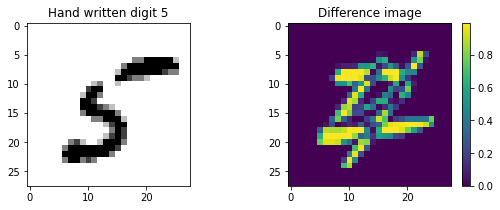

In [14]:
#example of an image and a difference between two images (in absolute value)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))

N = 47
ax1.imshow(x_train[N], cmap='gray_r')
ax1.set_title('Hand written digit '+str(y_train[N]))

m = abs(x_train[199]-x_train[1133])
im = ax2.imshow(m, cmap='viridis', interpolation='none')
ax2.set_title('Difference image')
plt.colorbar(im, ax=ax2)

plt.show()

**Assignment 1**

We first try different way to implement a function for the $L_{\infty}$ metric between to images where the distance between $a$ and $b$ is defined as
$$d_{\infty}(a,b)=max_{i,j}|b_{ij}-a_{ij}|$$

In [143]:
#Numpy implementation following the definition
def dist_inf_first(image1,image2):    
    return np.max(np.abs(image2 - image1))

#Implementation that uses numpy norm. Images need to be flattened since norm works only with one dimensional arrays
def dist_inf_second(image1, image2):
    return np.linalg.norm(image1.flatten() - image2.flatten(), ord=np.inf)

#Naive implementation, using nested loops
def dist_inf_third(image1,image2):
    max_diff=0
    flag=False
    for i in range(28):
        for j in range(28):
            cand_max=np.abs(image2[i][j]-image1[i][j])
            if cand_max>max_diff:
                max_diff=cand_max
            if max_diff>0.99999:
                flag = True
                break
        if flag:
            break
    return max_diff

#Plus the function chebyshev from scipy
from scipy.spatial.distance import chebyshev

#in the following we may refer to it as 'Chebyshev distance'

In the following we use the Jupyter magic function $\verb|%%timeit|$ to compare how fast are the different implementations on a random couple of images. 

In [17]:
%%timeit
dist_inf_first(x_train[197],x_train[443])

14.4 µs ± 718 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [18]:
%%timeit
dist_inf_second(x_train[197],x_train[443])

23.6 µs ± 3.77 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [19]:
%%timeit
dist_inf_third(x_train[197],x_train[443])

5.93 ms ± 755 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
%%timeit
chebyshev(x_train[197].flatten(),x_train[443].flatten())

87.6 µs ± 5.74 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


It seems that the first implementation may be the fastest. Some time can be saved by pre-flattening the array of images but for our purposes the difference is not very significant.

In the same way we try to implement the $L_1$ metric defined as
$$d_1(a,b)=\sum_{i,j}|b_{ij}-a_{ij}|$$

In [141]:
#Numpy implementation following the definition
def dist_1_first(image1,image2):
    return np.sum(np.abs(image1 - image2))

#Implementation that uses numpy norm
def dist_1_second(image1, image2):
    return np.linalg.norm(image1.flatten() - image2.flatten(), ord=1)

#Naive implementation, using nested loops
def dist_1_third(image1,image2):
    partial=0
    for i in range(28):
        for j in range(28):
            partial+=np.abs(image2[i][j]-image1[i][j])
    return partial

#scipy implementation
from scipy.spatial.distance import cityblock

#in the following we may refer to it as 'Manhattan distance'

In [75]:
%%timeit
dist_1_first(x_train[197],x_train[443])

16.4 µs ± 2.18 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [28]:
%%timeit
dist_1_second(x_train[197],x_train[443])

22.8 µs ± 3.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [29]:
%%timeit
dist_1_third(x_train[197],x_train[443])

3.16 ms ± 336 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
%%timeit
cityblock(x_train[197].flatten(),x_train[443].flatten())

17.4 µs ± 781 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Also in this case the first implementation seems to be the fastest.
Then we implement some versions of the euclidean distance.

In [142]:
#Numpy implementation following the definition
def dist_2_first(image1,image2):
    return np.sqrt(np.sum((image1 - image2)**2))

#Implementation that uses numpy norm
def dist_2_second(image1, image2):
    return np.linalg.norm(image1.flatten() - image2.flatten(), ord=2)

#Naive implementation, using nested loops
def dist_2_third(image1,image2):
    partial=0
    for i in range(28):
        for j in range(28):
            partial+=(np.abs(image2[i][j]-image1[i][j]))**2
    return np.sqrt(partial)

#scipy implementation
from scipy.spatial.distance import euclidean

In [43]:
%%timeit
dist_2_first(x_train[197],x_train[443])

20.5 µs ± 2.07 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [40]:
%%timeit
dist_2_second(x_train[197],x_train[443])

19.1 µs ± 679 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [36]:
%%timeit
dist_2_third(x_train[197],x_train[443])

7.22 ms ± 671 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [46]:
%%timeit
euclidean(x_train[197].flatten(),x_train[443].flatten())

25 µs ± 3.08 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


For the euclidean distance the first two implementation had overlapping times. In this case we choose the second implementation.\
\
**Assignment 2**


In the next step we have to implement a function that considers the first $N$ images in the array $x\_train$ and computes the distance matrix between them according to a chosen distance among the ones defined above.

In [56]:
#Naive version of distance matrix
def distance_matrix(N,distance):
    D = np.zeros((N, N))
    for i in range(N):
        for j in range(i, N):
            D[i][j] = distance(x_train[i], x_train[j])
            D[j][i] = D[i][j] 
            #Simplification to avoid calculations. 
            #While D is symmetric in the definition in computer arithmetic we could have D[i][j] not equal to D[j][i]
    return D        


In [58]:
%%timeit
distance_matrix(100,dist_2_second)

133 ms ± 16.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [145]:
#Another implementation using scipy pairwise distance
from scipy.spatial.distance import pdist, squareform
def distance_matrix_sc(N,distance):
    '''Compute the distance matrix of the first N elements of x_train according to some distance using scipy pdist'''
    image_subset = x_train[:N] 
    image_vectors = image_subset.reshape(N, -1)  
    dist_matrix = pdist(image_vectors, distance) #computes only the upper triangular matrix, excluding also the diagonal  
    dist_matrix = squareform(dist_matrix) #transforms it into a symmetric matrix
    return dist_matrix

In [92]:
%%timeit
distance_matrix_sc(100,dist_2_second)

98.8 ms ± 7.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


**Assignment 3**

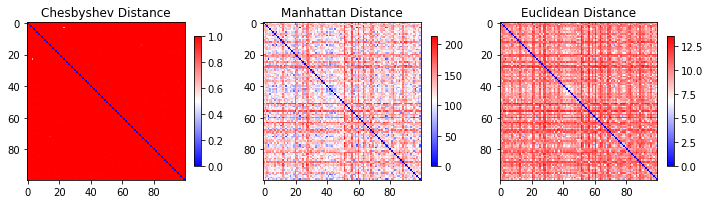

In [101]:
dinf=distance_matrix_sc(100,dist_inf_first)
d1=distance_matrix_sc(100,dist_1_first)
d2=distance_matrix_sc(100,dist_2_second)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

im1 = axes[0].imshow(dinf, cmap='bwr', interpolation='none')
axes[0].set_title('Chesbyshev Distance')
cb1 = plt.colorbar(im1, ax=axes[0], shrink=0.6)

im2 = axes[1].imshow(d1, cmap='bwr', interpolation='none')
axes[1].set_title('Manhattan Distance')
cb2 = plt.colorbar(im2, ax=axes[1], shrink=0.6)

im3 = axes[2].imshow(d2, cmap='bwr', interpolation='none')
axes[2].set_title('Euclidean Distance')
cb3 = plt.colorbar(im3, ax=axes[2], shrink=0.6)

plt.show()

**Assignment 4**

In [47]:
def leave_one_out(matrix):
    error_count=0
    col_indices = np.argmin(matrix + np.diag(np.full(matrix.shape[0], np.inf)), axis=1) 
    #add infinity on the diagonal to avoid picking the images itself as its closest image 
    row_indices = np.arange(matrix.shape[0])
    for i in range(len(row_indices)):
        if y_train[row_indices[i]] != y_train[col_indices[i]]: #compare the "true" value of the two images
            error_count += 1
    return error_count/len(row_indices)    
        

In [104]:
%%timeit
leave_one_out(d2)

164 µs ± 7.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Assignment 5**

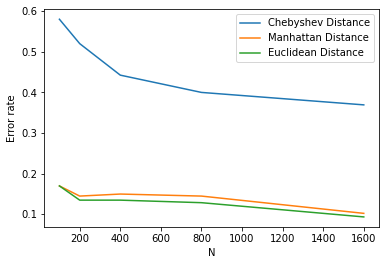

[[0.58     0.52     0.4425   0.4      0.369375]
 [0.17     0.145    0.15     0.145    0.1025  ]
 [0.17     0.135    0.135    0.12875  0.09375 ]]


In [147]:
distances = [dist_inf_first, dist_1_first, dist_2_second]
Ns = [100, 200, 400, 800, 1600]
error_matrix = []

#compute the error rates for each distance and N
error_rates = np.zeros((len(distances), len(Ns)))
for i, distance in enumerate(distances):
    dist_errors = []
    for j, N in enumerate(Ns):
        # Compute the distance matrix
        dist_matrix = distance_matrix_sc(N, distance)
        
        #compute the leave-one-out error rate
        error_rate = leave_one_out(dist_matrix)
        error_rates[i, j] = error_rate
        dist_errors.append(error_rate)
    error_matrix.append(dist_errors)

#plot the error rates as a function of N
plt.plot(Ns, error_rates[0], label='Chebyshev Distance')
plt.plot(Ns, error_rates[1], label='Manhattan Distance')
plt.plot(Ns, error_rates[2], label='Euclidean Distance')
plt.xlabel('N')
plt.ylabel('Error rate')
plt.legend()
plt.show()

#the transpose of the matrix presented in the text
error_matrix = np.array(error_matrix)
print(error_matrix)

**Assignment 6**

One way to compute the $H^1$ norm and the associated distance consists in extending the function $$f:\{0,27\}^2 \to [0,1]$$ that we have for each image $k$, i.e. $f(i,j)=x\_train[k][i][j]$, to a function $$f_\Omega:\Omega \to [0,1]$$ where $\Omega=[0,27]\times [0,27]$.\
It is clear that the extension is not unique, even after requiring continuity, and also its integral over $\Omega$ isn't unique.\
A good candidate for an extension of $f$ would be a function that is smooth and simple "enough" and that it is easily integrable. A simple extension in this sense is what is called **bilinear interpolation**.\
Given a square, that we can assume to be the unit square, and the value of a function $f$ on the four points the bilinear interpolation produces a $C^{\infty}$ function defined over the whole square of the form  
$$f(x,y)=a+bx+cy+dxy$$
Where the coefficents $a,b,c,d$ are defined as a function of the values of $f$ in the four corners:
$$a=f(0,0)$$
$$b=f(1,0)-f(0,0)$$
$$c=f(0,1)-f(0,0)$$
$$d=f(1,1)-f(1,0)-f(0,1)+f(0,0)$$



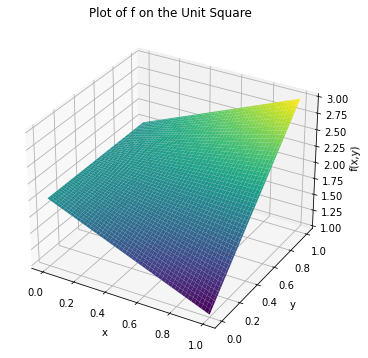

In [23]:
#example of bilinear interpolation f over the unit square given the follwoing values at the corners
p_00, p_10, p_01, p_11 = 2, 1, 2, 3

def f(x, y):
    return 2 - 1*x +0*y +2*x*y

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('Plot of f on the Unit Square')
plt.show()

In [54]:
def bilinear_interp(x, y, matrix):
    '''Calculate the bilinear interpolation at (x,y) given a grid. x and y must be between 0 and 26'''
    
    #find the four nearest points to (x, y), i.e. the square in which (x,y) is contained
    x1 = int(x)
    x2 = x1 + 1
    y1 = int(y)
    y2 = y1 + 1
    
    #calculate the weights for the four nearest points
    w1 = (x2 - x) * (y2 - y)
    w2 = (x - x1) * (y2 - y)
    w3 = (x2 - x) * (y - y1)
    w4 = (x - x1) * (y - y1)
    
    #calculate the interpolated value of f at (x, y)
    f_interp = w1*matrix[y1, x1] + w2*matrix[y1, x2] + w3*matrix[y2, x1] + w4*matrix[y2, x2]
    
    return f_interp

In [55]:
def plot_interpolated_function(f,n_points):
    '''Plot the bilinear interpolation given an image (i.e. a matrix 28x28) using n_points for the plot  '''
    
    #create a grid of points in the range [0, 27] x [0, 27]
    x = np.linspace(0, 26, n_points)
    y = np.linspace(0, 26, n_points)
    xx, yy = np.meshgrid(x, y)
    
    #compute the interpolated values of f on the grid of points
    f_interp = np.zeros((n_points, n_points))
    for i in range(n_points):
        for j in range(n_points):
            f_interp[i, j] = bilinear_interp(xx[i, j], yy[i, j], f)
    
    #create a heatmap visualization of the interpolated function
    plt.imshow(f_interp, cmap='viridis', extent=[0, 27, 0, 27])
    plt.colorbar()
    plt.title('Interpolated Function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

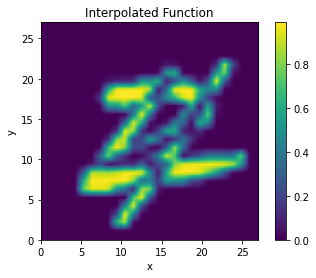

In [9]:
#an example of the now continuous difference between two images
plot_interpolated_function(abs(x_train[199]-x_train[1133]),100)

The integral of the bilinear function defined above can be computed exactly for each square
$$\int_{[0,1]\times[0,1]}(a+bx+cy+dxy)dydx=\frac{f(0,0)+f(0,1)+f(1,0)+f(1,1)}{4}$$

In [56]:
def exact_integral_int(image):
    '''Compute the exact integral of the bilinear interpolation over the entire grid'''
    integral=0
    for i in range(0,27):
        for j in range(0,27):
            integral+=(image[i,j]+image[i+1,j]+image[i+1,j+1]+image[i,j+1])/4
    return integral        

In [27]:
#create a copy of x_train normalized by the integral
#x_train_norm=np.copy(x_train)
#for i in range(len(x_train)):
#        x_train_norm[i]=x_train[i]/exact_integral_int(x_train[i])
#save the array of normalized images as .nsz        
#np.savez('norm.nsz',x_train_norm)
with np.load('norm.npz') as data:
    x_train_norm = data['arr_0']        

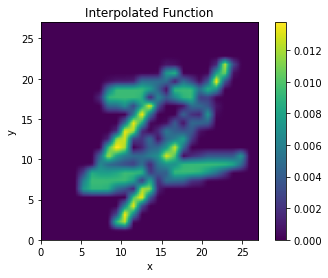

In [31]:
#plot of the interpolation of the normalized vectors
plot_interpolated_function(abs(x_train_norm[199]-x_train_norm[1133]),100)

The integral we have to calculate is the following
$$\int_{\Omega}|\nabla(f-g)|^2+(f-g)^2$$
To accelerate computation we note that it is possible to split the integrand to isolate elements that are not dependent on the pair $(f,g)$ but only on one of them
$$\int_{\Omega}|\nabla(f-g)|^2+(f-g)^2=\int_{\Omega}\left( \frac{\partial (f-g)}{\partial x}\right)^2+\left( \frac{\partial (f-g)}{\partial y}\right)^2+f^2+g^2-2fg$$
from the linearity of the partial derivative we can rewrite the integral as
$$\int_{\Omega}\left[\left(\frac{\partial f}{\partial x}\right)^2+\left(\frac{\partial f}{\partial y}\right)^2+f^2\right]+\int_{\Omega}\left[\left(\frac{\partial g}{\partial x}\right)^2+\left( \frac{\partial g}{\partial y}\right)^2+g^2\right]+\int_{\Omega}-2\frac{\partial f}{\partial x}\frac{\partial g}{\partial x}-2\frac{\partial f}{\partial y}\frac{\partial g}{\partial y}-2fg$$
where the first two terms can be pre-computed for every image. \
We can calculate the analytical solution of those integrals as functions of the points of the given image using **simpy** for each square.

In [139]:
import sympy as sym

#define the function f(x,y)
a, b, c, d, x, y, A, B, C, D = sym.symbols('a b c d x y A B C D')
f = a + b*x + c*y + d*x*y

#compute the partial derivatives of f(x,y) wrt x and y
df_dx = sym.diff(f, x)
df_dy = sym.diff(f, y)

#define the expression to integrate
expr = df_dx**2 + df_dy**2 + f**2

#expr=sym.expand(expr)
#expr=sym.simplify(expr)
result = sym.integrate(expr, (x, 0, 1), (y, 0, 1))

#exact solution wrt to weights a,b,c,d
#we want to substitute to give the solution as a function of the corners
#substitutions of the weights
#where f(0,0)=A, f(1,1)=D, f(1,0)=B, f(0,1)=C
result=result.subs(a, A)
result=result.subs(b, B-A)
result=result.subs(c, C-A)
result=result.subs(d, D+A-C-B)


sym.simplify(result)

7*A**2/9 - 2*A*B/9 - 2*A*C/9 - 11*A*D/18 + 7*B**2/9 - 11*B*C/18 - 2*B*D/9 + 7*C**2/9 - 2*C*D/9 + 7*D**2/9

In [29]:
#a function used for better numerical stability

def compensated_sum2(arr):
    '''reduce the error in a summation of values of different size'''
    s = np.sum(arr, axis=0)
    c = np.zeros_like(s)
    for x in arr:
        y = x + c
        t = s + np.abs(x) - np.abs(y)
        c = (t - s) - np.abs(x) + np.abs(y)
        s, c = t, c / 2
    return s

In [30]:
def integral_indep(image):
    '''calculate the part of the integral which depends only on the image'''
    A = image[:-1,:-1]
    B = image[1:,:-1]
    C = image[:-1,1:]
    D = image[1:,1:]
    
    #positive and negative part are computed separately to reduce the error
    integral_pos = compensated_sum2([14*A*A,14*B*B,14*C*C,14*D*D]) 
    integral_neg= compensated_sum2([4 *A*B,4*A*C,4*B*D,4*C*D,11*A*D,11*B*C])
    return np.sum(integral_pos-integral_neg)/18  

int_in=np.zeros(60000)

#create an array which contains the independent part of the integral for each image in the training set 
for i in range(len(x_train_norm)):
    int_in[i]=integral_indep(x_train_norm[i])

In [31]:
int_in

array([0.01165865, 0.01027246, 0.01730592, ..., 0.01532355, 0.01693568,
       0.01596617])

In [140]:
#section that computes the part of the integral that depends on both f and g with simpy
#define the variables
a, b, c, d, s, t, u, v, x, y, A, B, C, D, S, T, U, V = sym.symbols('a b c d s t u v x y A B C D S T U V')

#define the functions f(x,y) and g(x,y)
f = a + b*x + c*y + d*x*y
g = s + t*x + u*y + v*x*y

#compute the partial derivatives of f(x,y) and g(x,y) wrt x and y
df_dx = sym.diff(f, x)
df_dy = sym.diff(f, y)
dg_dx = sym.diff(g, x)
dg_dy = sym.diff(g, y)

#define the expression to integrate
expr = (df_dx * dg_dx) + (df_dy * dg_dy) + (f * g)

#integrate the expression wrt x from 0 to 1
expr_int_x = sym.integrate(expr, (x, 0, 1))

#integrate the resulting expression wrt y from 0 to 1
result = sym.integrate(expr_int_x, (y, 0, 1))

result=result.subs(a, A)
result=result.subs(b, B-A)
result=result.subs(c, C-A)
result=result.subs(d, D+A-C-B)

result=result.subs(s, S)
result=result.subs(t, T-S)
result=result.subs(u, U-S)
result=result.subs(v, V+S-U-T)
# Print the result
sym.simplify(2*result)

14*A*S/9 - 2*A*T/9 - 2*A*U/9 - 11*A*V/18 - 2*B*S/9 + 14*B*T/9 - 11*B*U/18 - 2*B*V/9 - 2*C*S/9 - 11*C*T/18 + 14*C*U/9 - 2*C*V/9 - 11*D*S/18 - 2*D*T/9 - 2*D*U/9 + 14*D*V/9

In [24]:
#naive implementation of the h1_distance on the normalized training set
#loops only on one variable

adm_arr = np.arange(756)

excluded_nums = [27 + n * 28 for n in range(27)]
excluded_indices = np.array(excluded_nums) 

#remove the excluded numbers using indexing and boolean masks
adm_arr = np.delete(adm_arr, excluded_indices)

def h1_distance_naive(a, b):
    '''takes as input teh indexes of the two images'''
    integral= int_in[a]+int_in[b]
    image1=x_train_norm[a].flatten()
    image2=x_train_norm[b].flatten()
    partialpos=0
    partialneg=0
    for i in adm_arr:
        A,B,C,D =image1[i],image1[i+1],image1[i+28],image1[i+29]
        S,T,U,V =image2[i],image2[i+1],image2[i+28],image2[i+29]
        #partialpos+=compensated_sum([28*A*S,28*B*T,28*D*V,28*C*U])
        #partialneg+=compensated_sum([4*A*T,4*A*U,4*B*S,4*B*V,4*C*S,4*C*V,4*D*T,4*D*U,11*A*V,11*B*U,11*C*T,11*D*S])
        partialpos+=28*(A*S+B*T+D*V+C*U)
        partialneg+=4*(A*T+A*U+B*S+B*V+C*S+C*V+D*T+D*U)+11*(A*V+B*U+C*T+D*S)
    integral=integral-(partialpos-partialneg)/18           
    return integral

In [32]:
%%timeit
#means the distance between the image x_train_norm[1143] and itself
h1_distance_naive(1143,1143)
#the result is 1.8028735032649124e-09 which is sufficiently smaller in practice than non-zero integrals

15 ms ± 559 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
#an attempt to a faster distance function

def h1_distance_2(a, b):
    '''takes as input the two indexes of the images'''
    #pre-computed integrals
    integral= int_in[a]+int_in[b]
    #obtain the matrices
    image1=x_train_norm[a]
    image2=x_train_norm[b]
    partialpos=0
    partialneg=0
    A, B, C, D = image1[:-1, :-1], image1[1:, :-1], image1[:-1, 1:], image1[1:, 1:]
    S, T, U, V = image2[:-1, :-1], image2[1:, :-1], image2[:-1, 1:], image2[1:, 1:]
    partialpos+=np.array([28*A*S,28*B*T,28*D*V,28*C*U])
    partialneg+=np.array([4*A*T,4*A*U,4*B*S,4*B*V,4*C*S,4*C*V,4*D*T,4*D*U,11*A*V,11*B*U,11*C*T,11*D*S])
    integral=integral-np.sum(compensated_sum2(partialpos)-compensated_sum2(partialneg))/18           
    return integral

In [37]:
%%timeit
h1_distance_2(1143,1143)
#the result is 0.0

680 µs ± 72.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [39]:
#the scipy method used before give some problems with h1_distance_2: it return a different matrix wrt to h1_distance_naive
#even if the two distances obtain (up to very small values) the same results for every example manually inserted
#broadcasting would be faster but in combination with the vectorization inside h1_distance_2 become complicated
def distance_matrix_h1(N,distance):
    '''Very naive calculation of the distance matrix'''
    D = np.zeros((N, N))
    for i in range(N):
        for j in range(i, N):
            D[i][j] = distance(i,j)
            D[j][i] = D[i][j] 
    return D

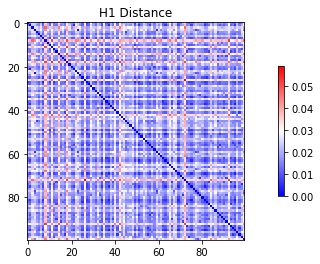

In [40]:
dh1=distance_matrix_h1(100,h1_distance_2)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

im = axes.imshow(dh1, cmap='bwr', interpolation='none')
axes.set_title('H1 Distance')
cb = plt.colorbar(im, shrink=0.6)
plt.show()

In [45]:
%%timeit
distance_matrix_h1(100,h1_distance_2)

2.97 s ± 103 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


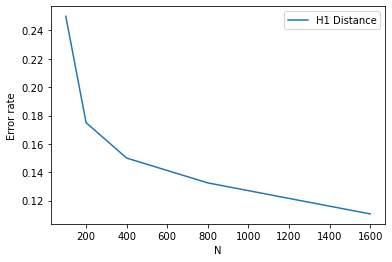

[[0.25     0.175    0.15     0.1325   0.110625]]


In [150]:
#calculate the error with the same parameters used for the other distances
distances = [h1_distance_2]
Ns = [100, 200, 400,800,1600]
error_matrix = []

#compute the error rates for each distance and N
error_rates = np.zeros((len(distances), len(Ns)))
for i, distance in enumerate(distances):
    dist_errors = []
    for j, N in enumerate(Ns):
        #compute the distance matrix
        dist_matrix = distance_matrix_h1(N,distance)
        
        #compute the leave-one-out error rate
        error_rate = leave_one_out(dist_matrix)
        error_rates[i, j] = error_rate
        dist_errors.append(error_rate)
    error_matrix.append(dist_errors)

#plot the error rates as a function of N
plt.plot(Ns, error_rates[0], label='H1 Distance')
plt.xlabel('N')
plt.ylabel('Error rate')
plt.legend()
plt.show()

error_matrix = np.array(error_matrix)
print(error_matrix)

The distance based on the norm $H^1$ on the bilinear interpolated function seems to perform much better than the distance based on the norm infinity but not better than the other two distances used.

**Assignment 7**

For this assignment we choose to use the in-built implementation of the distances that sklearn provides.\
BallTree is a module of sklearn.

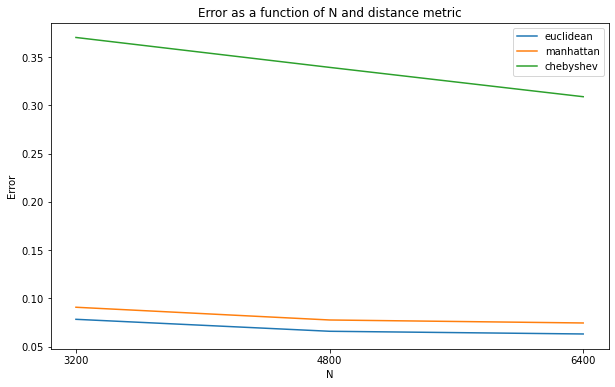

[[0.0783 0.0908 0.3704]
 [0.0659 0.0776 0.3394]
 [0.0631 0.0745 0.309 ]]


In [50]:
#the BallTree module of sklearn works natively on flattened one dimensional array
x_train = np.reshape(x_train, (60000, 28*28)) 
x_test = np.reshape(x_test, (10000, 28*28)) 

distances = ['euclidean', 'manhattan', 'chebyshev']
n_values = [3200, 4800, 6400]

#initialize the error matrix
error_matrix = np.zeros((len(n_values), len(distances)))

#loop over different values of N and distances
for i, n in enumerate(n_values):
    for j, distance in enumerate(distances):
        #build a tree using the first N entries of the training set
        tree = BallTree(x_train[:n], leaf_size=40, metric=distance)

        #construct a function to test the efficiency
        error_count = 0
        for k in range(len(x_test)):
            #query the tree for the nearest neighbor
            _, ind = tree.query([x_test[k]], k=1)
            #assign as predicted digit the digit of the x_train[ind] image
            predicted_digit = y_train[ind[0]]
            #check if y_train[ind] is equal to the corresponding entry in y_test[k]
            if predicted_digit != y_test[k]:
                error_count += 1

        #calculate the efficiency
        error_matrix[i, j] = error_count / len(x_test)
        
#plot the results
plt.figure(figsize=(10,6))
for j, distance in enumerate(distances):
    plt.plot(n_values, error_matrix[:,j], label=distance)
plt.title('Error as a function of N and distance metric')
plt.xlabel('N')
plt.ylabel('Error')
plt.xticks(n_values)
plt.legend()
plt.show()

print(error_matrix)

We can try to see if the results are better when we increase the number of "closest neighbour(s)" and decide via majority voting (here with the 3 closest neighbour)

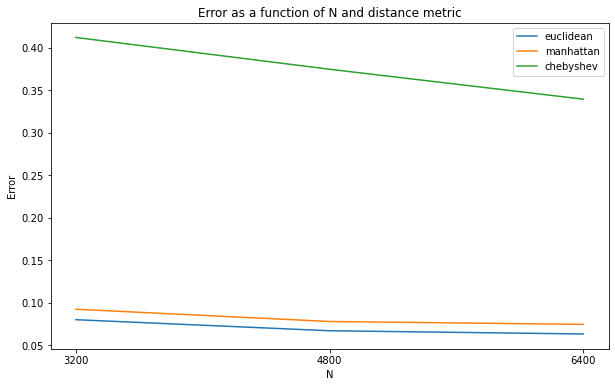

In [63]:
from scipy.stats import mode
#needed for majority voting

x_train = np.reshape(x_train, (60000, 28*28)) 
x_test = np.reshape(x_test, (10000, 28*28)) 

distances = ['euclidean', 'manhattan', 'chebyshev']
n_values = [3200, 4800, 6400]

#initialize the error matrix
error_matrix = np.zeros((len(n_values), len(distances)))
#loop over different values of N and distances
for i, n in enumerate(n_values):
    for j, distance in enumerate(distances):
        #build a tree using the first N entries of the training set
        tree = BallTree(x_train[:n], leaf_size=40, metric=distance)

        #construct a function to test the efficiency
        error_count = 0
        for k in range(len(x_test)):
            #query the tree for the 3 nearest neighbors
            _, indices = tree.query([x_test[k]], k=3)
            #assign as predicted digit the majority voted digit from the 3 closest neighbors
            predicted_digit = mode(y_train[indices], axis=None).mode[0]
            #check if the predicted digit is equal to the corresponding entry in y_test[k]
            if predicted_digit != y_test[k]:
                error_count += 1

        #calculate the efficiency
        error_matrix[i, j] = error_count / len(x_test)
plt.figure(figsize=(10,6))
for j, distance in enumerate(distances):
    plt.plot(n_values, error_matrix[:,j], label=distance)
plt.title('Error as a function of N and distance metric')
plt.xlabel('N')
plt.ylabel('Error')
plt.xticks(n_values)
plt.legend()
plt.show()        

In [64]:
error_matrix

array([[0.0798, 0.0921, 0.412 ],
       [0.0668, 0.0777, 0.3746],
       [0.063 , 0.0743, 0.3394]])

The result does not looks better compared with the closest neighbour case.\
Now to implement the ball tree with the $H^1$ distance some preliminary work must be done. Since the algorithm works with flattened images we have to redefine the function for the $h_1$ distance that can accept flattened images. Secondly we have to be able to use images from a normalized version of $x\_test$

In [80]:
x_test_norm=np.copy(x_test)
for i in range(len(x_test)):
        x_test_norm[i]=x_test[i]/exact_integral_int(x_test[i])

In [60]:
#slower version of h1 distance but compatible with the "metric" parameter of BallTree 
def h1_distance_flattened(image1, image2):
    '''takes as input the two flattened images'''
    #reshape the images
    image1= image1.reshape((28, 28))
    image2= image2.reshape((28, 28))
    
    #compute the integrals that in this case are not precomputed
    integral=integral_indep(image1)+integral_indep(image2)
         
    partialpos=0
    partialneg=0
    A, B, C, D = image1[:-1, :-1], image1[1:, :-1], image1[:-1, 1:], image1[1:, 1:]
    S, T, U, V = image2[:-1, :-1], image2[1:, :-1], image2[:-1, 1:], image2[1:, 1:]
    partialpos+=np.array([28*A*S,28*B*T,28*D*V,28*C*U])
    partialneg+=np.array([4*A*T,4*A*U,4*B*S,4*B*V,4*C*S,4*C*V,4*D*T,4*D*U,11*A*V,11*B*U,11*C*T,11*D*S])
    integral=integral-np.sum(compensated_sum2(partialpos)-compensated_sum2(partialneg))/18           
    return integral

In the following because of **computational limitation** the test is conducted on a test set of smaller dimension

time check
time check


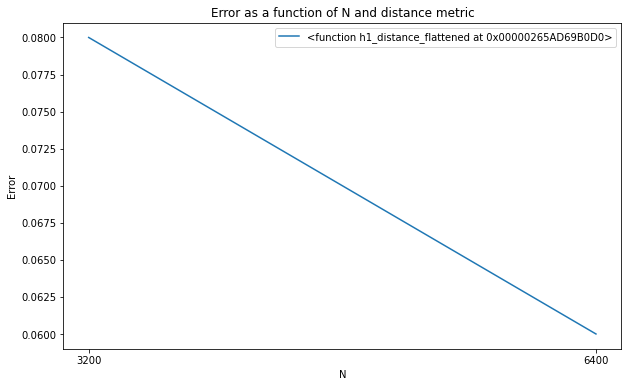

[[0.08]
 [0.06]]


In [81]:
#the BallTree module of sklearn works natively on flattened one dimensional array
x_train_norm = np.reshape(x_train_norm, (60000, 28*28)) 
x_test_norm = np.reshape(x_test_norm, (10000, 28*28)) 
x_test_norm=x_test_norm[:100]

distances = [h1_distance_flattened]
n_values = [3200,6400]

#initialize the error matrix
error_matrix = np.zeros((len(n_values), len(distances)))

#loop over different values of N and distances
for i, n in enumerate(n_values):
    for j, distance in enumerate(distances):
        #build a tree using the first N entries of the training set
        tree = BallTree(x_train_norm[:n], leaf_size=40, metric=distance)
        print('time check')
        #construct a function to test the efficiency
        error_count = 0
        for k in range(len(x_test_norm)):
            #query the tree for the nearest neighbor
            _, ind = tree.query([x_test_norm[k]], k=1)
            #assign as predicted digit the digit of the x_train[ind] image
            predicted_digit = y_train[ind[0]]
            #check if y_train[ind] is equal to the corresponding entry in y_test[k]
            if predicted_digit != y_test[k]:
                error_count += 1

        #calculate the efficiency
        error_matrix[i, j] = error_count / len(x_test_norm)
        
#plot the results
plt.figure(figsize=(10,6))
for j, distance in enumerate(distances):
    plt.plot(n_values, error_matrix[:,j], label=distance)
plt.title('Error as a function of N and distance metric')
plt.xlabel('N')
plt.ylabel('Error')
plt.xticks(n_values)
plt.legend()
plt.show()

print(error_matrix)

In [83]:
#the BallTree module of sklearn works natively on flattened one dimensional array
distances = [h1_distance_flattened]
n_values = [6400]

#initialize the error matrix
error_matrix = np.zeros((len(n_values), len(distances)))

#loop over different values of N and distances
for i, n in enumerate(n_values):
    for j, distance in enumerate(distances):
        #build a tree using the first N entries of the training set
        tree = BallTree(x_train_norm[:n], leaf_size=40, metric=distance)
        #construct a function to test the efficiency
        error_count = 0
        for k in range(len(x_test_norm)):
            #query the tree for the nearest neighbor
            _, indices = tree.query([x_test_norm[k]], k=3)
            #assign as predicted digit the digit of the x_train[ind] image
            predicted_digit = mode(y_train[indices], axis=None).mode[0]
            #check if y_train[ind] is equal to the corresponding entry in y_test[k]
            if predicted_digit != y_test[k]:
                error_count += 1

        #calculate the efficiency
        error_matrix[i, j] = error_count / len(x_test_norm)
        
print(error_matrix)

[[0.06]]


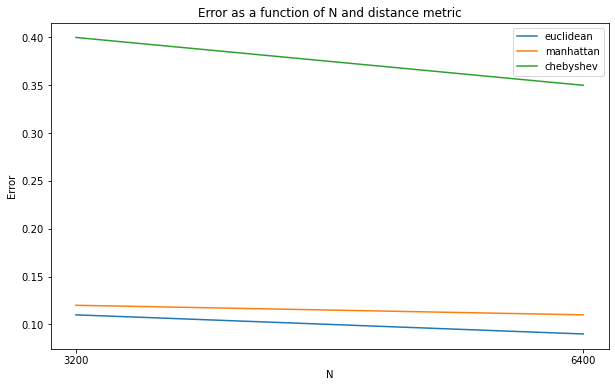

[[0.11 0.12 0.4 ]
 [0.09 0.11 0.35]]


In [82]:
#to compare with the previous distances with a smaller set of test
x_train = np.reshape(x_train, (60000, 28*28)) 
x_test = np.reshape(x_test, (10000, 28*28))
x_test=x_test[:100]

distances = ['euclidean', 'manhattan', 'chebyshev']
n_values = [3200, 6400]

#initialize the error matrix
error_matrix = np.zeros((len(n_values), len(distances)))

#loop over different values of N and distances
for i, n in enumerate(n_values):
    for j, distance in enumerate(distances):
        #build a tree using the first N entries of the training set
        tree = BallTree(x_train[:n], leaf_size=40, metric=distance)

        #construct a function to test the efficiency
        error_count = 0
        for k in range(len(x_test)):
            #query the tree for the nearest neighbor
            _, ind = tree.query([x_test[k]], k=1)
            #assign as predicted digit the digit of the x_train[ind] image
            predicted_digit = y_train[ind[0]]
            #check if y_train[ind] is equal to the corresponding entry in y_test[k]
            if predicted_digit != y_test[k]:
                error_count += 1

        #calculate the efficiency
        error_matrix[i, j] = error_count / len(x_test)
        
#plot the results
plt.figure(figsize=(10,6))
for j, distance in enumerate(distances):
    plt.plot(n_values, error_matrix[:,j], label=distance)
plt.title('Error as a function of N and distance metric')
plt.xlabel('N')
plt.ylabel('Error')
plt.xticks(n_values)
plt.legend()
plt.show()

print(error_matrix)

It seems that the $h_1$ distance is a bit better than both the euclidean distance and the manhattan distance with respect to this algorithm. 